<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day6_use_LSTM_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMDB 데이터셋으로 LSTM 학습시키기


In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 350

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_X_train[0]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding  

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])


17465344/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
(25000,) (25000,)
350


In [ ]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 153s 245ms/step - loss: 0.4794 - acc: 0.7649 - val_loss: 0.4559 - val_acc: 0.8264
Epoch 2/15
625/625 [==============================] - 152s 243ms/step - loss: 0.2725 - acc: 0.8939 - val_loss: 0.3246 - val_acc: 0.8720
Epoch 3/15
625/625 [==============================] - 152s 244ms/step - loss: 0.2216 - acc: 0.9135 - val_loss: 0.3298 - val_acc: 0.8620
Epoch 4/15
625/625 [==============================] - 152s 243ms/step - loss: 0.1635 - acc: 0.9411 - val_loss: 0.3674 - val_acc: 0.8620
Epoch 5/15
625/625 [==============================] - 152s 243ms/step - loss: 0.1337 - acc: 0.9529 - val_loss: 0.4010 - val_acc: 0.8650
Epoch 6/15
625/625 [==============================] - 152s 243ms/step - loss: 0.1043 - acc: 0.9635 - val_loss: 0.3892 - val_acc: 0.8476
Epoch 7/15
625/625 [==============================] - 153s 244ms/step - loss: 0.0838 - acc: 0.9704 - val_loss: 0.4873 - val_acc: 0.8498
Epoch 8/15
625/625 [============================

학습 과정 그리기


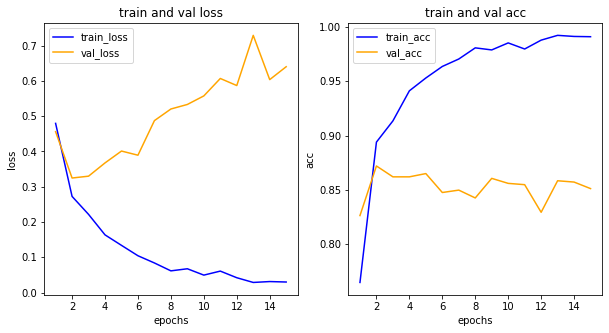

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()
